In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

In [5]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [6]:
from sklearn.model_selection import train_test_split  # 훈련세트와 테스트 테스트를 적절하게 섞어서 만들어주는 함수

In [7]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)

In [10]:
print(test_target)

[1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]


In [11]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target)

In [12]:
print(test_target)

[0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.]


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
kn = KNeighborsClassifier()

In [16]:
# 훈련 fit
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [18]:
# 정확도 확인 - 테스트 세트
kn.score(test_input, test_target)

1.0

In [19]:
# 도미 - 길이 25cm, 무게 150g
kn.predict([[25, 150]])

array([0.])

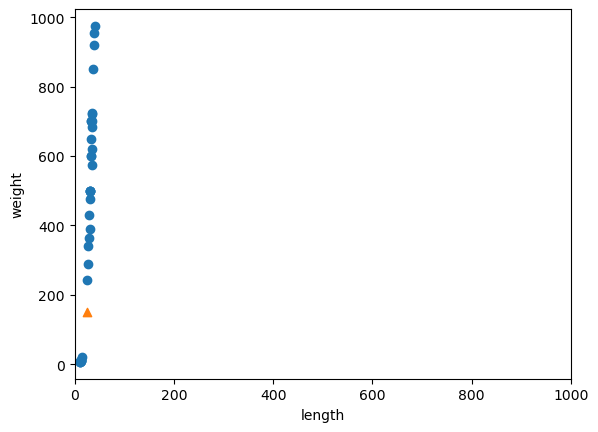

In [23]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlim((0, 1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [24]:
# 측정 수치 [25, 150] 최근접 이웃 5개  kneighbors
distances, indexes = kn.kneighbors([[25, 150]])

In [26]:
# print(indexes)
train_target[indexes]

array([[1., 0., 0., 0., 1.]])

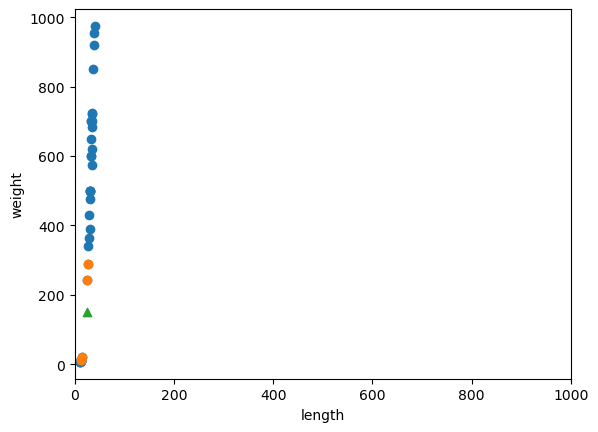

In [28]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(train_input[indexes, 0], train_input[indexes, 1])
plt.scatter(25, 150, marker='^')
plt.xlim((0, 1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [31]:
# 평균
mean = np.mean(train_input, axis=0)

# 표준 편차
std = np.std(train_input, axis=0)


In [33]:
# 표준 점수로 훈련 세트 전처리
train_scaled = (train_input - mean) / std
print(train_scaled)

[[ 0.83973367  0.8595719 ]
 [ 0.33148868 -0.14071198]
 [-1.5693476  -1.37106114]
 [ 0.53478668  0.53689968]
 [ 0.78890917  0.60143412]
 [-0.13609672 -0.61826686]
 [ 0.94138267  1.34358023]
 [-1.7218211  -1.37751459]
 [ 1.19550517  1.56945078]
 [ 0.40264298  0.21422746]
 [-1.6405019  -1.37654657]
 [ 0.73808467  0.45623163]
 [ 0.68726018  0.69823579]
 [-0.02428282 -0.30204809]
 [ 0.22983968 -0.01164309]
 [ 0.73808467  0.81117107]
 [ 1.44962767  1.7469205 ]
 [ 0.63643568  0.8595719 ]
 [-1.2644006  -1.3355672 ]
 [-1.4981933  -1.36751175]
 [ 0.43313768  0.21422746]
 [ 0.63643568  0.8595719 ]
 [ 0.83973367  0.94023995]
 [ 0.30099398  0.21422746]
 [-0.04461262 -0.46338419]
 [-1.6506668  -1.37493321]
 [-1.4575337  -1.35589555]
 [ 0.48396218  0.21422746]
 [ 0.53478668  0.53689968]
 [ 0.83973367  0.92410634]
 [-1.5185231  -1.36718908]
 [-1.5185231  -1.3668664 ]
 [ 1.19550517  1.68238605]
 [-1.3965443  -1.35976762]
 [ 0.43313768  0.13355941]
 [ 0.22983968 -0.22783348]]


In [35]:
new = (np.array([25, 150]) - mean) / std
print(new)

[-0.17675631 -0.9151253 ]


In [37]:
test_scaled = (test_input - mean) / std

In [38]:
kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)

1.0

In [39]:
kn.predict([new])

array([1.])

In [40]:
distances, indexes = kn.kneighbors([new])
print(indexes)

[[ 5 24 13 35  1]]


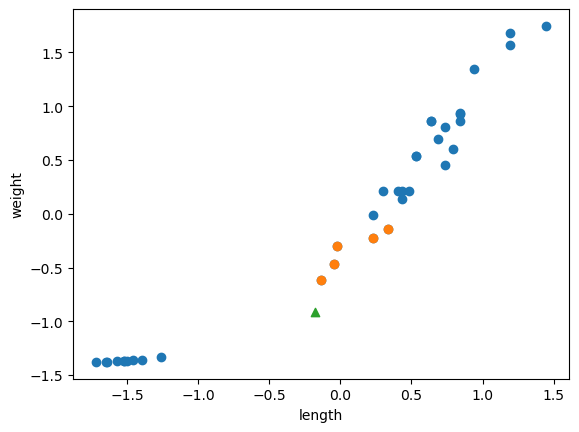

In [41]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1])
# plt.scatter(25, 150, marker='^')
plt.scatter(new[0], new[1], marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler

In [45]:
ss = StandardScaler()  # fit, transform - 표준점수 변환

In [46]:
ss.fit(fish_data)

StandardScaler()

In [49]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [50]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [51]:
kn.score(test_scaled, test_target)

1.0

In [52]:
kn.predict([new])

array([1.])